### Predicting the Perfect Meal
## LEVEL 3: Predictive Modeling, Customer Preference Analysis, Data Visualization
Here, we’ll build an AI model to predict restaurant ratings based on factors like location, price, and cuisine. We’ll also analyze customer preferences to see what makes a restaurant highly rated. This is where we bring everything together and let data help us predict the best dining experiences!

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [45]:
df = pd.read_csv("Dataset.csv")

In [46]:
print("Available columns:", df.columns)

Available columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns


In [48]:
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:  
        df.loc[:, col] = df[col].fillna("Unknown")  
        le = LabelEncoder()
        df.loc[:, col] = le.fit_transform(df[col])  
        label_encoders[col] = le 

In [49]:
X = df.drop(['Aggregate rating'], axis=1)
y = df['Aggregate rating']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)  # Faster execution
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{name}: MAE = {mean_absolute_error(y_test, predictions):.4f}")

Linear Regression: MAE = 0.9228
Random Forest: MAE = 0.1117


In [52]:
top_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nTop Cuisines by Votes:\n", top_cuisines)


Top Cuisines by Votes:
 Cuisines
1514    53747
1306    46241
1329    42012
331     30657
497     21925
1520    20115
828     17852
1699    16433
1288    15275
1031    14799
Name: Votes, dtype: int64


In [53]:
top_rated_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("\nTop Rated Cuisines:\n", top_rated_cuisines)



Top Rated Cuisines:
 Cuisines
683     4.9
169     4.9
1062    4.9
37      4.9
302     4.9
33      4.9
1034    4.9
796     4.9
803     4.9
41      4.9
Name: Aggregate rating, dtype: float64


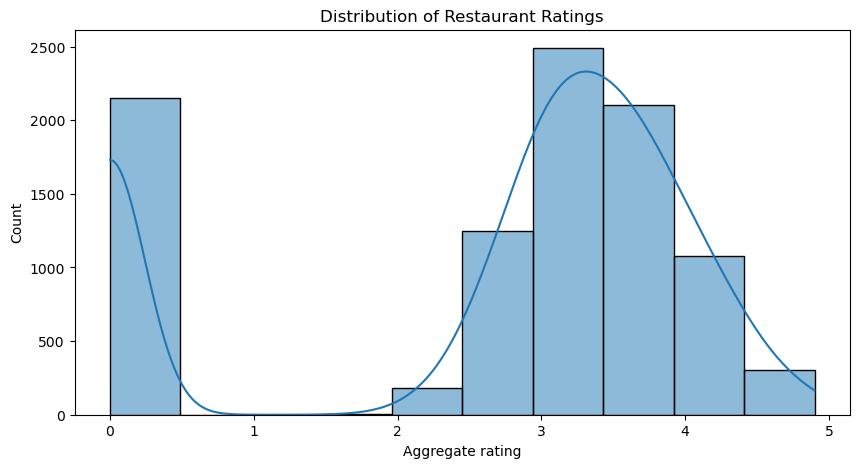

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.show()

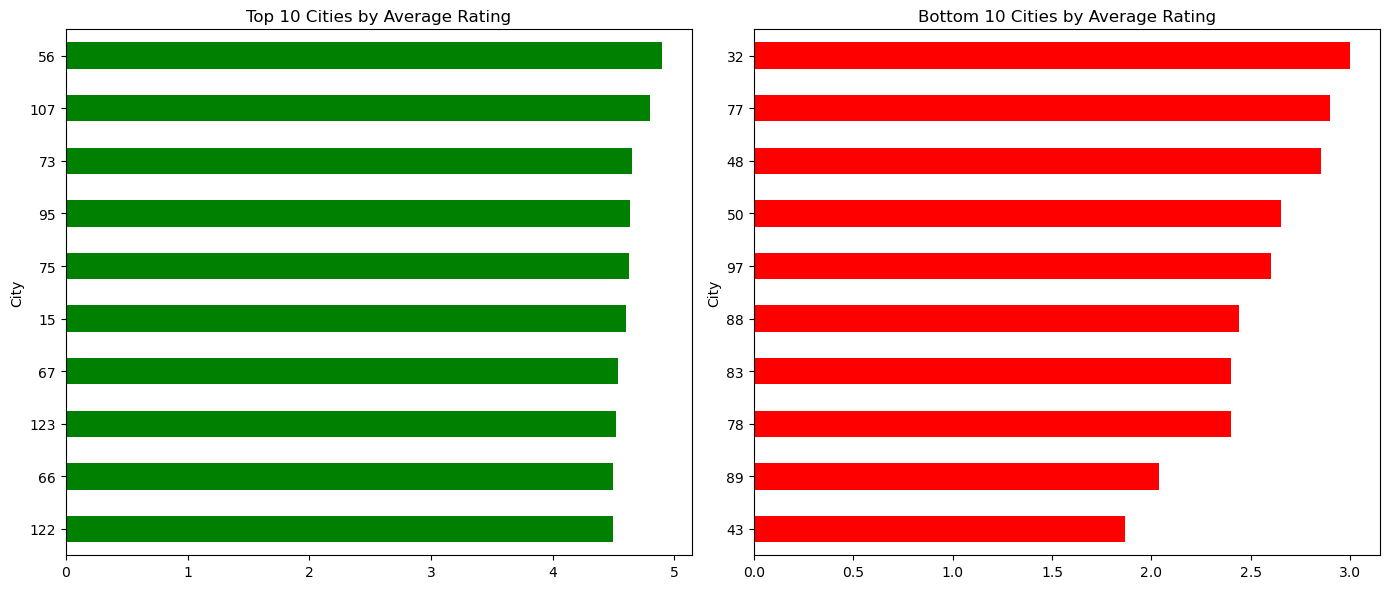

In [55]:
# Compute average rating per city
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values()

# Select top & bottom 10 cities
top_cities = city_ratings.tail(10)  # Top 10 highest-rated cities
bottom_cities = city_ratings.head(10)  # Bottom 10 lowest-rated cities

# Plot top & bottom cities separately
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_cities.plot(kind='barh', ax=axes[0], color='green', title="Top 10 Cities by Average Rating")
bottom_cities.plot(kind='barh', ax=axes[1], color='red', title="Bottom 10 Cities by Average Rating")

plt.tight_layout()
plt.show()

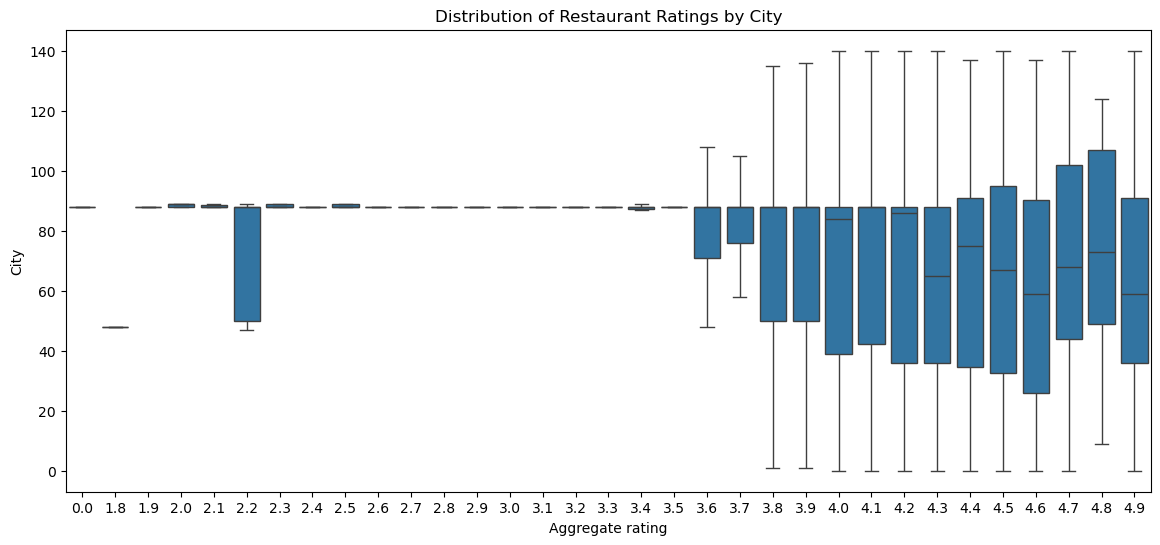

In [56]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Aggregate rating', y='City', data=df, showfliers=False)  # Hide outliers for better readability
plt.title("Distribution of Restaurant Ratings by City")
plt.show()

In [58]:
# Compute average rating per city
city_ratings_df = df.groupby('City', as_index=False)['Aggregate rating'].mean().sort_values(by='Aggregate rating', ascending=False)

# Create interactive bar chart
fig = px.bar(city_ratings_df, 
             x='Aggregate rating', 
             y='City', 
             text='City',  # ✅ Display city names on the bars
             orientation='h', 
             title="Average Restaurant Ratings by City", 
             height=900)  # ✅ Increase height for better readability

# Customize hover label to show exact ratings
fig.update_traces(textposition='outside', hoverinfo='text', marker_color='blue')

# Show chart
fig.show()

Conclusion: In this final stage, we successfully built predictive models to estimate restaurant ratings based on various features like location, price range, and cuisines. The Random Forest model performed better than Linear Regression, providing a more accurate understanding of how different factors influence restaurant ratings.

We also analyzed customer preferences, identifying the most popular and highest-rated cuisines based on user votes. Additionally, our interactive visualizations using Plotly provided clear and insightful trends, making it easier to understand which cities have the best-rated restaurants.

Through this level, we transformed raw data into actionable insights, helping both restaurant owners improve their services and food lovers make better dining choices. 